#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [66]:
# Read CSV
df = pd.read_csv("https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [67]:
df.duplicated().any()

True

Periksa apakah ada missing values

In [69]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

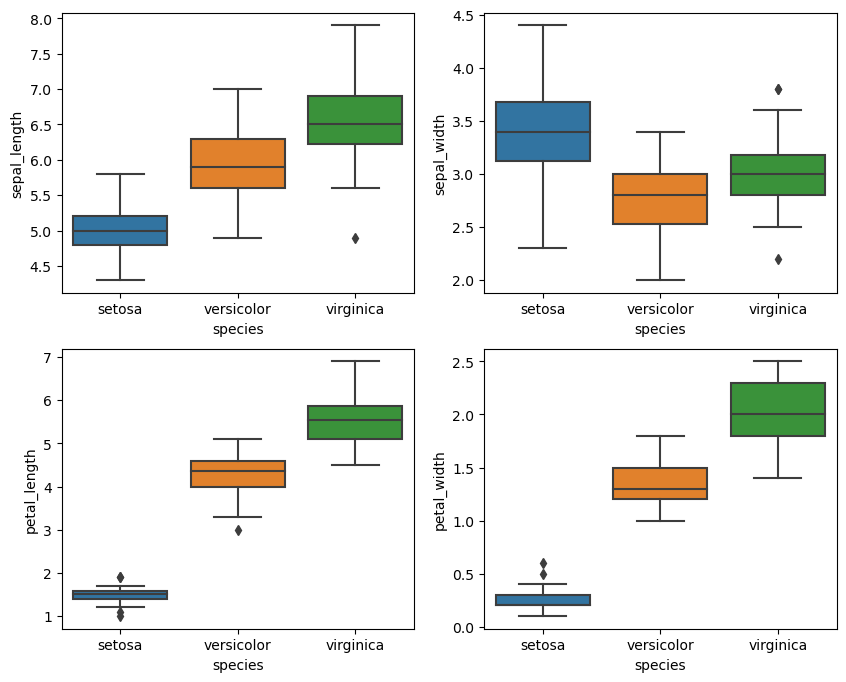

In [70]:
plt.figure(figsize=(10, 8))
for x in df.columns[:4]:
    plt.subplot(2, 2, df.columns.get_loc(x) + 1)
    sns.boxplot(x='species', y=x, data=df)
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [71]:
X = df.drop(['species'], axis=1)
y = df['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [74]:
# make model 
logistic = LogisticRegression(random_state=0)
logistic.fit(X_train, y_train)
print(logistic)

LogisticRegression(random_state=0)


Uji model dengan dataset test

In [75]:
y_pred = logistic.predict(X_test)
print(y_pred)

['setosa' 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor'
 'virginica' 'setosa' 'setosa']


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[6 0 0]
 [0 4 0]
 [0 0 5]]
Accuracy Score: 1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [77]:
gaussian = GaussianNB()
print(gaussian)

GaussianNB()


Uji hasil model dengan data test

In [78]:
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
print(y_pred)

['setosa' 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor'
 'virginica' 'setosa' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [79]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[6 0 0]
 [0 4 0]
 [0 0 5]]
Accuracy Score: 1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [80]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
print(knn)

KNeighborsClassifier(metric='euclidean')


Uji model dengan data test

In [81]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)

['setosa' 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor'
 'virginica' 'setosa' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [82]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[6 0 0]
 [0 4 0]
 [0 0 5]]
Accuracy Score: 1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

##### Logistic Regression:
```
Confusion Matrix
 [[6 0 0]
 [0 4 0]
 [0 0 5]]
Accuracy Score: 1.0
```
##### Naive Bayes:
```
Confusion Matrix
 [[6 0 0]
 [0 4 0]
 [0 0 5]]
Accuracy Score: 1.0
```
##### K-Nearest Neighbor:
```
Confusion Matrix
 [[6 0 0]
 [0 4 0]
 [0 0 5]]
Accuracy Score: 1.0
```

pada hasil akurasi diatas, dapat dilihat bahwa ketiga model klasifikasi memiliki akurasi yang sama yaitu 1.0 atau 100%.
Dengan demikian, dapat disimpulkan bahwa tidak ada model klasifikasi yang lebih baik dari yang lainnya. Hal ini bisa terjadi karena dataset yang digunakan memiliki jumlah data yang sedikit, sehingga tidak ada perbedaan yang signifikan antara ketiga model klasifikasi tersebut.